In [1]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
#Read the dataset

df = pd.read_csv("")
df.head()
data = df.copy()

In [3]:
df.columns  #Dataset has 10 independent features amd 1 dependent feature (MEDIAN_HOUSE_VALUE)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
#Shape of our dataframe

data.shape

(20640, 10)

In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [7]:
#Total of missing values in the dataframe

data.isnull().sum().sort_values(ascending=False)

total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
#Percentage of missing values in the dataframe. We comee to know that there is 0.01% missing values in total_bedrooms feature.

data.isnull().sum().sort_values(ascending=False)/len(df) 

total_bedrooms        0.010029
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

#### Now we check missing values in total_bedrooms is significant for our target variable.

Text(0.5, 1.0, 'Median_House_Value')

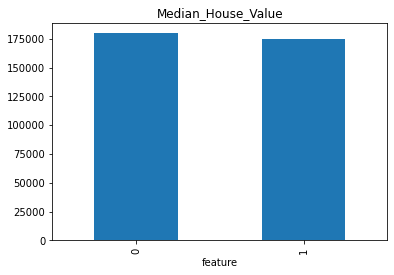

In [9]:
data["feature"] = np.where(data["total_bedrooms"].isnull(),1,0)
data["feature"].value_counts()
data.groupby('feature')["median_house_value"].median().plot.bar() 
plt.title("Median_House_Value")

We see that the missing values have a median house value approx equal to non NaN values. So we have to fill these NaN values with some technique.

By observation, our dataset contains only Numerical features (Continuous and Categorical)

Let us check how many leves our categorical variable (ocean_proximity) has and how it affects the target variable

In [10]:
data["ocean_proximity"].value_counts()  #5 different values

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Text(0, 0.5, 'Median_House_Value')

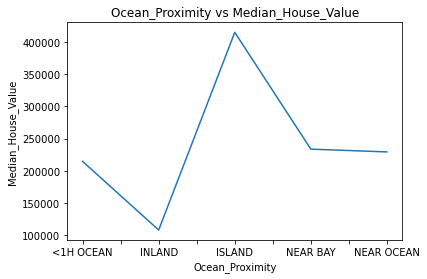

In [12]:
data.groupby('ocean_proximity')["median_house_value"].median().plot()
plt.title("Ocean_Proximity vs Median_House_Value")
plt.xlabel("Ocean_Proximity")
plt.ylabel("Median_House_Value")

Inland houses has the least median house value and Island is the costliest. There is definetly a relationship between these 2 variables.

#### Let us check the relationship of all independent variables with dependent variables

Dividing continuous and categorical feature

In [13]:
categorical_feature = data.iloc[ : , 9]
continuous_feature = data.iloc[:, 2:9]
categorical_feature.head()
continuous_feature.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41,880,129.0,322,126,8.3252,452600
1,21,7099,1106.0,2401,1138,8.3014,358500
2,52,1467,190.0,496,177,7.2574,352100
3,52,1274,235.0,558,219,5.6431,341300
4,52,1627,280.0,565,259,3.8462,342200


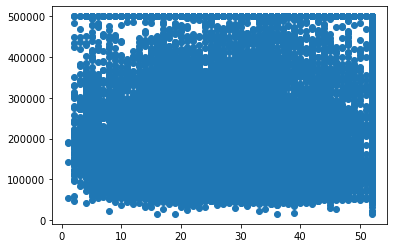

In [14]:
plt.scatter(data["housing_median_age"],data["median_house_value"])

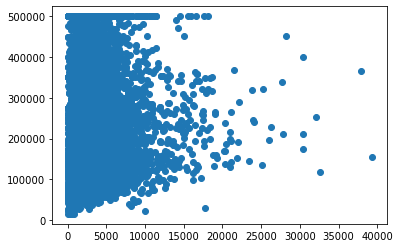

In [15]:
plt.scatter(data["total_rooms"],data["median_house_value"])

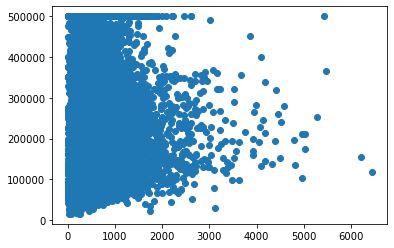

In [16]:
plt.scatter(data["total_bedrooms"],data["median_house_value"])

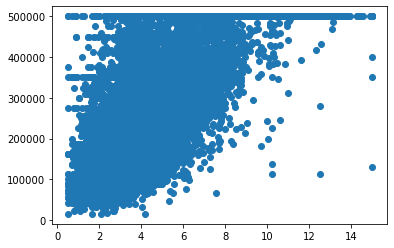

In [17]:
plt.scatter(data["median_income"],data["median_house_value"])

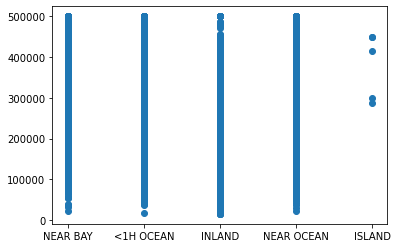

In [18]:
plt.scatter(data["ocean_proximity"],data["median_house_value"])

In [19]:
continuous_feature.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41,880,129.0,322,126,8.3252,452600
1,21,7099,1106.0,2401,1138,8.3014,358500
2,52,1467,190.0,496,177,7.2574,352100
3,52,1274,235.0,558,219,5.6431,341300
4,52,1627,280.0,565,259,3.8462,342200


#### Let us check the distribution of data using coordinates

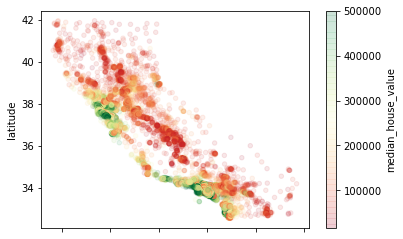

In [20]:
data.plot(kind="scatter",x="longitude", y="latitude",alpha=0.1,c="median_house_value",cmap=plt.get_cmap("RdYlGn"),colorbar=True)

It shows that the green areas are much costlier than the red ones. Houses nearer to ocean are costlier

#### Distribution of continuous features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011F8FEE7EB0>,
      dtype=object)

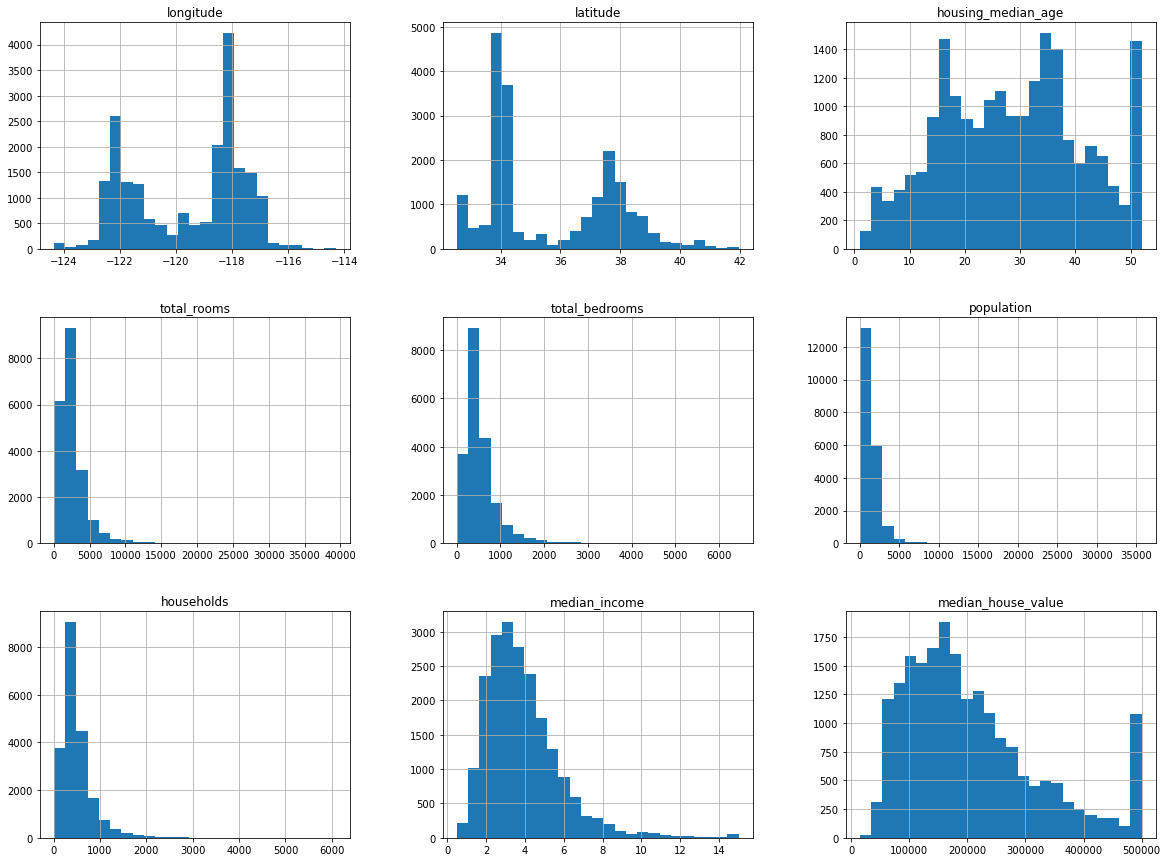

In [21]:
data.iloc[: , :-1].hist(bins=25,figsize=(20,15))

#### Most of the features are skewed. So we must treat the missing values and perform Normalization.

In [22]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,feature
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,0


Filling the null values with median of total_bedrooms.

In [23]:
median_bedrooms = statistics.median(data["total_bedrooms"])
data["total_bedrooms"].fillna(median_bedrooms, inplace=True)

In [24]:
median_bedrooms

429.0

In [25]:
data.isnull().sum().sort_values(ascending=False)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
feature               0
dtype: int64

Now there are no null values in entire dataset.

#### Now we perform log transformation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011F8ED4BE50>,
      dtype=object)

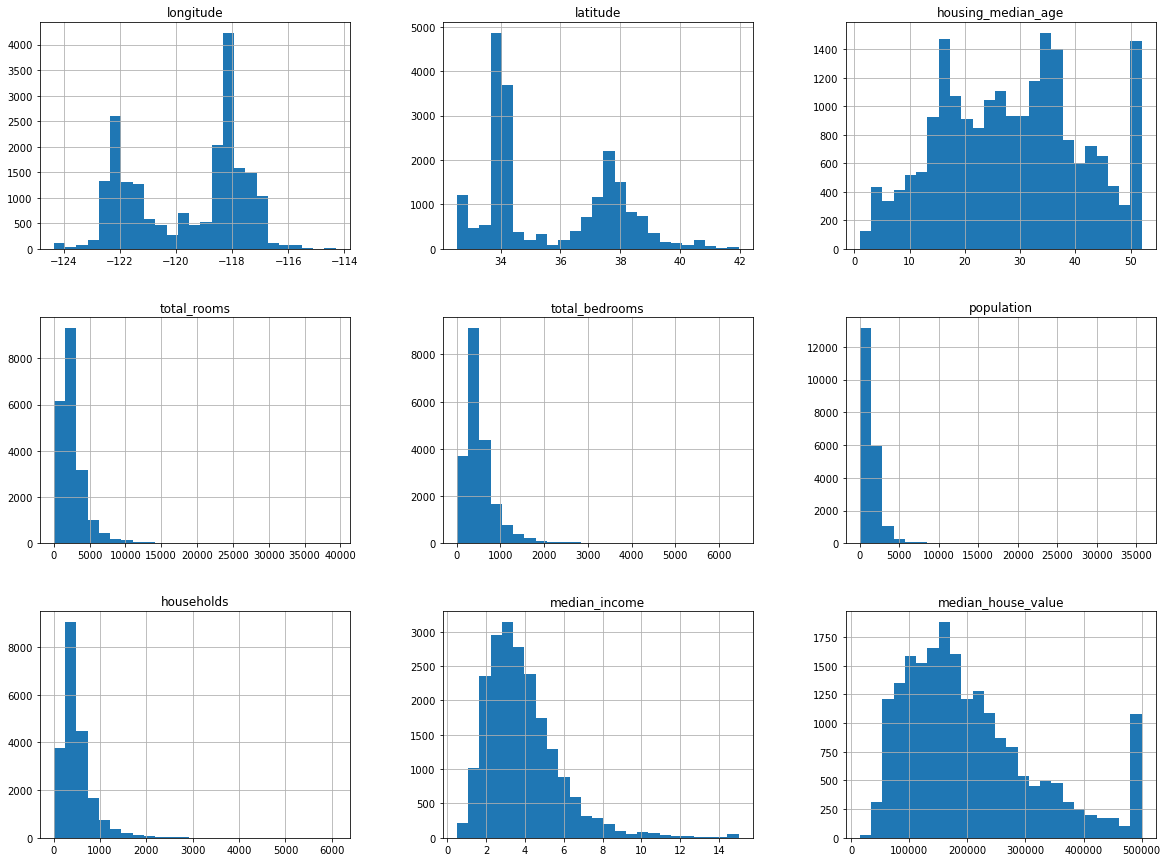

In [26]:
data.iloc[: , :-1].hist(bins=25,figsize=(20,15))

#### Checking for Outliers for continuous variables

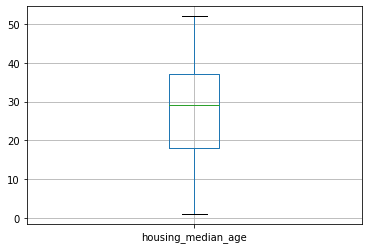

In [27]:
data.boxplot("housing_median_age")

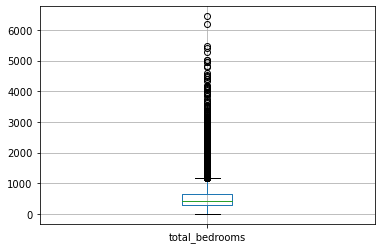

In [28]:
data.boxplot("total_bedrooms")

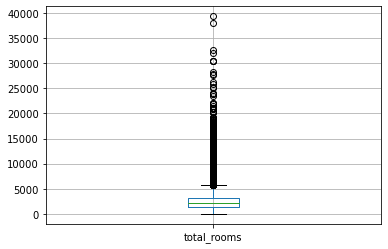

In [29]:
data.boxplot("total_rooms")

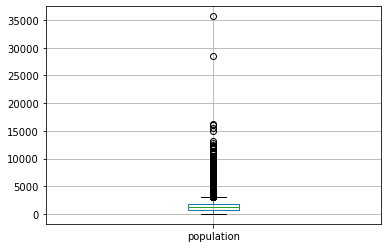

In [30]:
data.boxplot("population")

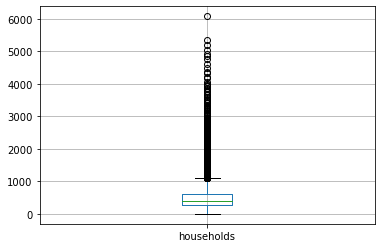

In [31]:
data.boxplot("households")

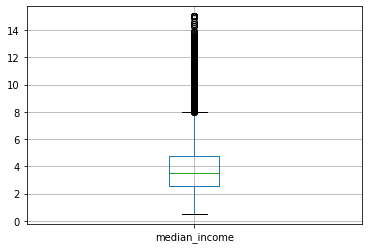

In [32]:
data.boxplot("median_income")

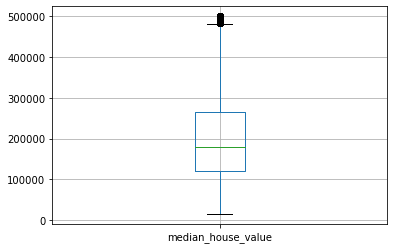

In [33]:
data.boxplot("median_house_value")

There are a whole lot of outliers in above stated continuous variables which we need to deal with.

In [34]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,feature
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,0


#### Convert Categorical feature into numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
data1["ocean_proximity"] = le.fit_transform(data1["ocean_proximity"])

In [ ]:
data1.head()

Since the variables in the datset are of different types, Example: house_median_age is in Years, total_bedrooms is count, median_income is in Dollars/Rupees, So we perform standardization to convert features to gaussian distribution.

In [63]:
names = data1.columns

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data1)

StandardScaler()

In [66]:
scaled_df = scaler.fit_transform(data1)
data1 = pd.DataFrame(scaled_df, columns=names)

In [67]:
data1.head()

,longitude,latitude,median_house_value,ocean_proximity,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327835,1.052548,2.129631,1.291089,0.982143,-0.804819,-0.972298,-0.974429,-0.977033,2.344766
1,-1.322844,1.043185,1.314156,1.291089,-0.607019,2.045890,1.357238,0.861439,1.669961,2.332238
2,-1.332827,1.038503,1.258693,1.291089,1.856182,-0.535746,-0.826851,-0.820777,-0.843637,1.782699
3,-1.337818,1.038503,1.165100,1.291089,1.856182,-0.624215,-0.719554,-0.766028,-0.733781,0.932968
4,-1.337818,1.038503,1.172900,1.291089,1.856182,-0.462404,-0.612257,-0.759847,-0.629157,-0.012881


#### Since our work is done now, we perform feature selection. 

In [68]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

To use Select from model, we need to specify our independent and dependent features.

In [69]:
y = data1["median_house_value"]

In [70]:
X = data1.drop(["median_house_value"],axis =1)

In [71]:
feature_sel_model = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))

In [72]:
feature_sel_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

Lasso Regression penalises best fit line for excessive slope in case of Multi Linear regression. It makes the coefficient of features nearer to 0 while penalising.

SelectFromModel selects the features which are non-zero to make our model more efficient.

In [73]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

It tells us that all the features in X are necessary for our model.

## Model Building (Starting with Linear Regression)

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 71)

In [76]:
reg = LinearRegression()

In [77]:
reg.fit(X_train,y_train)

LinearRegression()

In [78]:
y_pred = reg.predict(X_test)

In [79]:
from sklearn.metrics import r2_score

In [89]:
print(r2_score(y_test,y_pred))

0.6324368255291535


LInear regression gives us an accuracy of 63%. So we try with different algorithms.

## Before we move on to different algorithms, we check for multicollinearity.

In [82]:
import statsmodels.api as sm

In [83]:
X = sm.add_constant(X)

In [84]:
X.head()

,const,longitude,latitude,ocean_proximity,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.0,-1.327835,1.052548,1.291089,0.982143,-0.804819,-0.972298,-0.974429,-0.977033,2.344766
1,1.0,-1.322844,1.043185,1.291089,-0.607019,2.045890,1.357238,0.861439,1.669961,2.332238
2,1.0,-1.332827,1.038503,1.291089,1.856182,-0.535746,-0.826851,-0.820777,-0.843637,1.782699
3,1.0,-1.337818,1.038503,1.291089,1.856182,-0.624215,-0.719554,-0.766028,-0.733781,0.932968
4,1.0,-1.337818,1.038503,1.291089,1.856182,-0.462404,-0.612257,-0.759847,-0.629157,-0.012881


In [85]:
model = sm.OLS(y, X).fit()

In [86]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     3998.
Date:                Thu, 24 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:49:54   Log-Likelihood:                -18869.
No. Observations:               20640   AIC:                         3.776e+04
Df Residuals:                   20630   BIC:                         3.784e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.857e-17      0.004  -1.16e-14      1.000      -0.008       0.008
longitude             -0.7391      0.013    -57.244      0.000      -0.764      -0.714
latitude              -0.7857      0.013    -61.653      0.000      -0.811      -0.761
ocean_proximity        0.0009      0.005      0.194      0.846      -0.008       0.010
housing_median_age     0.1248      0.005     26.444      0.000       0.116       0.134
total_rooms           -0.1252      0.015     -8.532      0.000      -0.154      -0.096
total_bedrooms         0.2943      0.022     13.518      0.000       0.252       0.337
population            -0.3911      0.011    -36.976      0.000      -0.412      -0.370
households             0.2633      0.022     11.784      0.000       0.219       0.307
median_income          0.6545      0.005    119.297      0.000       0.644       0.665
==============================================================================
Omnibus:                     5042.039   Durbin-Watson:                   0.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18955.459
Skew:                           1.185   Prob(JB):                         0.00
Kurtosis:                       7.052   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
X.corr()

,const,longitude,latitude,ocean_proximity,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,NaN,1.000000,-0.924664,-0.289779,-0.108197,0.044568,0.069110,0.099773,0.055310,-0.015176
latitude,NaN,-0.924664,1.000000,0.200974,0.011173,-0.036100,-0.066473,-0.108785,-0.071035,-0.079809
ocean_proximity,NaN,-0.289779,0.200974,1.000000,0.112468,-0.015693,-0.014627,-0.070282,-0.018186,-0.014957
housing_median_age,NaN,-0.108197,0.011173,0.112468,1.000000,-0.361262,-0.319022,-0.296244,-0.302916,-0.119034
total_rooms,NaN,0.044568,-0.036100,-0.015693,-0.361262,1.000000,0.927030,0.857126,0.918484,0.198050
total_bedrooms,NaN,0.069110,-0.066473,-0.014627,-0.319022,0.927030,1.000000,0.873497,0.974327,-0.007613
population,NaN,0.099773,-0.108785,-0.070282,-0.296244,0.857126,0.873497,1.000000,0.907222,0.004834
households,NaN,0.055310,-0.071035,-0.018186,-0.302916,0.918484,0.974327,0.907222,1.000000,0.013033
median_income,NaN,-0.015176,-0.079809,-0.014957,-0.119034,0.198050,-0.007613,0.004834,0.013033,1.000000


Multicollinearity exists between some independent variables. For that we can try to perform Ridge Regression.

In [88]:
from sklearn.linear_model import Ridge

In [90]:
ridge = Ridge(alpha=0.005,normalize=True)

In [91]:
ridge.fit(X_train , y_train)

Ridge(alpha=0.005, normalize=True)

In [93]:
ridge_pred = ridge.predict(X_test)

In [95]:
print(r2_score(y_test,ridge_pred))

0.6310579558819789


Not much further development.

## Decision Tree Regression

In [96]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [98]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [99]:
dt_pred = dt.predict(X_test)

In [100]:
print(r2_score(y_test,dt_pred))

0.6528665194731172


Bit better accuracy than Linear regression models

## Random Forest Regression

In [101]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor()

In [102]:
rfreg.fit(X_train,y_train)

RandomForestRegressor()

In [103]:
rfreg_pred = rfreg.predict(X_test)

In [104]:
print(r2_score(y_test,rfreg_pred))

0.8117596324911707


Random Forest regression provides with 81% accuracy on our test data.